In [ ]:
#Import thư viện
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
train = '../input/fer2013-tgmt/Dataset_Fer2013_fix/train'
val = '../input/fer2013-tgmt/Dataset_Fer2013_fix/test'

In [ ]:
#xử lí data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(48,48),
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val,
        target_size=(48,48),
        color_mode="grayscale",
        class_mode='categorical')

Found 22473 images belonging to 5 classes.
Found 5692 images belonging to 5 classes.


In [ ]:
#Tạo layer model
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2))) #24

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #12
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #6
model.add(Dropout(0.5))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                        

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=20,
    verbose=1,
    restore_best_weights=True,
)



In [ ]:
#training model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-7),metrics=['accuracy'])
batch_size = 32
history = model.fit(
            train_generator,
            steps_per_epoch=22473/ batch_size,
            epochs=200,
            callbacks=[early_stopping],
            verbose = 1,
            validation_data=validation_generator,
            validation_steps=5692/ batch_size)

Epoch 1/200


2024-01-07 09:20:21.006513: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


702/702 [==============================] - 191s 265ms/step - loss: 1.5869 - accuracy: 0.2758 - val_loss: 1.6033 - val_accuracy: 0.2883
Epoch 2/200
702/702 [==============================] - 53s 76ms/step - loss: 1.5593 - accuracy: 0.2854 - val_loss: 1.5689 - val_accuracy: 0.2994
Epoch 3/200
702/702 [==============================] - 53s 75ms/step - loss: 1.4531 - accuracy: 0.3638 - val_loss: 1.3081 - val_accuracy: 0.4701
Epoch 4/200
702/702 [==============================] - 52s 74ms/step - loss: 1.2816 - accuracy: 0.4610 - val_loss: 1.1707 - val_accuracy: 0.5125
Epoch 5/200
702/702 [==============================] - 53s 75ms/step - loss: 1.1582 - accuracy: 0.5205 - val_loss: 1.1092 - val_accuracy: 0.5302
Epoch 6/200
702/702 [==============================] - 53s 75ms/step - loss: 1.0788 - accuracy: 0.5571 - val_loss: 0.9655 - val_accuracy: 0.6168
Epoch 7/200
702/702 [==============================] - 53s 75ms/step - loss: 1.0247 - accuracy: 0.5872 - val_loss: 0.9291 - val_accuracy: 0.

In [ ]:
#Lưu model
model_json = model.to_json()
with open("fer_arch_final.json", "w") as json_file:
    json_file.write(model_json)
model.save('fer_model_final.h5')

Sai số kiểm tra là:  0.6529649496078491
Độ chính xác kiểm tra là:  0.76335209608078


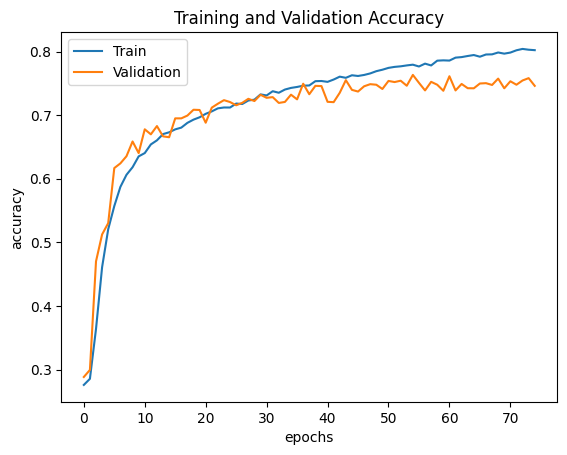

In [ ]:
#đánh giá model
score = model.evaluate(validation_generator,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Validation'])
plt.title('Training and Validation Accuracy')
plt.savefig('bestModelGraph.png')
plt.show()

Sai số huấn luyện là:  0.5089105367660522
Độ chính xác huấn luyện là:  0.8018510937690735


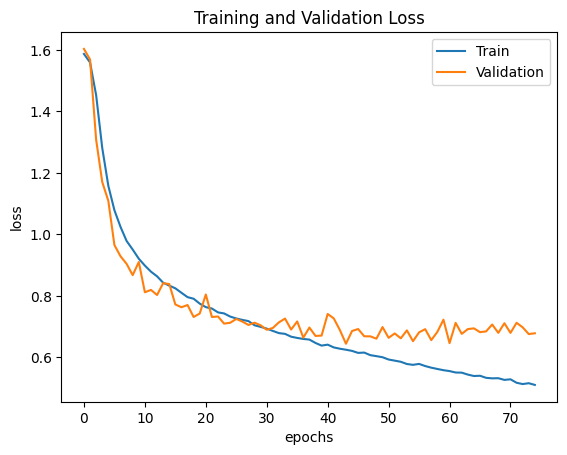

In [ ]:
# đánh giá model
score = model.evaluate(train_generator,verbose=0)
print('Sai số huấn luyện là: ',score[0])
print('Độ chính xác huấn luyện là: ',score[1])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Validation'])
plt.title('Training and Validation Loss')
plt.savefig('Loss.png')
plt.show()


177/177 [==============================] - 8s 46ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

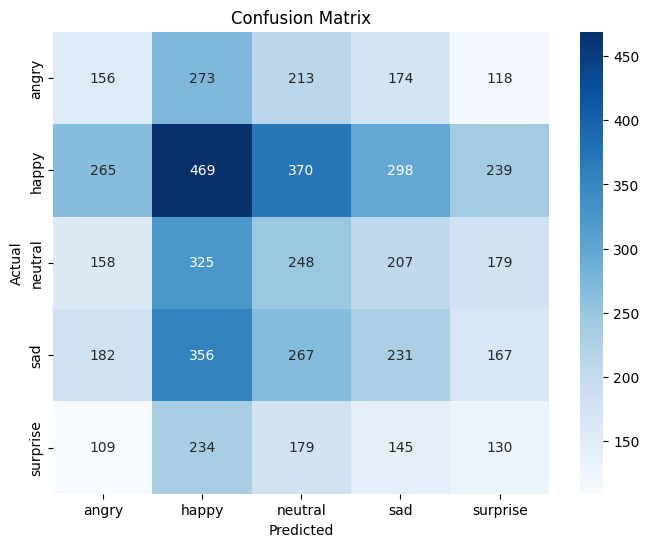

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Dự đoán các nhãn cho tập kiểm thử
Y_pred = model.predict(validation_generator, steps=5692/batch_size)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_true, y_pred)

# Vẽ ma trận nhầm lẫn với seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Confusion_Matrix.png')
plt.show